A Survey on Technology Choice
======


## Hypothesis

The response variable that I analyzed for this project was PG5_3HDS, or Helpful Discussion on StackExchange. With respect to this variable, I predict that there a few other response variables that affect the priority given to StackExchange discussions. I think the priority is going to be affected by the participant's purpose for the project as well as the participant's level of development experience. I believe that people using the project for training/classes and people with less development experience will rank the StackExchange discussions with higher priority.

## Calculated Measures

I found the correlations between my response variable (Helpful Stack Exchange Discussions) and all of the other variables in the survey. I used the cor function to find these correlations.

## Descriptive Analysis of Proposed Measures

I initially found the correlations between my response variable and all of the other variables. Then, by examining the results of the correlations, I filtered out the variables that had an insignificant correlation with my variable. Additionally, I filtered out variables that I thought were irrelevant.

## Transformation and Cleaning

The data was transformed by filtering out irrelevant variables. I filtered out the Start, End, and question Submit times because they were not relevant to what I was testing. I also filtered out the Device column because the device being used shouldn't affect the priority given to Stack Exchange discussions. Finally, I filtered out all of the other variables associated with Question 5, because we were told they could not correlate with each other. Cleaning up the data like this will make the final results easier to interpret.

## Correlation Analysis

The variables that I chose to filter out either had very low correlations or were irrelevant to my hypothesis. Even if the variables for questions 1 and 6 had low correlations, they were still kept for the sake of testing my hypothesis.

## Statistical Model

I used a linear regression to test my hypothesis and fit the data. It was the solution that I've had the most experience with, so I decided to use it. It may not have produced very accurate results, but it is good start if I wanted to conduct further analysis.

## Interpretation

As mentioned in the previous section, the results of my model may not have been very accurate. My model produced an R squared value of 0.72, so my model is not a very good fit for the data. Additionally, I looked at the correlations between Helpful Discussions on StackExchange and the variables from my hypothesis to see if my hypothesis held true. 

For the participant's reason for using the project, I predicted that those who were using the project for a class/training would correlate highest with StackExchange discussions. However, according to the results, the PG1Trn variable had a rather low relationship (0.32) with StackExchange discussions. Interestingly, my response variable had a higher relationship (0.71) with those using the project for a wider audience. 

For the participant's amount of development experience, I predicted that those with a lower amount of development experience would have a higher correlation with StackExchange Discussions. According to my model, my response variable had a higher relationship (0.77) with the responses for development experience.

These results are a good start for testing my hypothesis, but there is no way to tell if they are accurate with my current model. A better model could be created using some form of clustering to find more accurate relationships between different variables.

## Suggestion for Survey Improvement

There were a good amount of incomplete surveys within the data. Making sure that participants give an answer to each question would provide a more complete dataset. It also makes examining the data easier/faster because filtering out the incomplete data would not be necessary.
 

In [50]:
# For nicer printing
options(digits=2);

library(dplyr)
library(tidyr)
library(ggplot2)

In [51]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

exclude <- c("PG5_1RRPQ", "PG5_2BNUI", "PG5_4VGP", "PG5_PHR", "PG5_6SSYOP",
          "PG5_7NDYP", "PG5_8CP", "PG5_9FRP", "PG5_10RPA", "PG5_11NSG",
          "PG5_12NWG", "PG5_13NFG")

#data <- data %>% select(-c(exclude))
#print(data)

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))

for (i in 0:12) {
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}

#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [53]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

### Interpret  basic summaries

In [54]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);

cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


Interpret correlations: only Start vs End, calculate difference instead


### Simple questions (answered in the following sections)

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

In [55]:
# finding the number of people that actually finished the survey
data_completed = filter(data, Completed == TRUE)
print(paste0("Opened surveys: ", nrow(data)))
print(paste0("Completed surveys: ", nrow(data_completed)))

print("--------------------------------")
# calculate how long the survey took for everyone that completed it
time_to_complete = data_completed$End - data_completed$Start
print(paste0("Average time to complete survey: ", mean(time_to_complete), " seconds"))
print(paste0("Fastest time to complete survey: ", min(time_to_complete), " seconds"))
print(paste0("Slowest time to complete survey: ", max(time_to_complete), " seconds"))
print(paste0("Median time to complete survey: ", median(time_to_complete), " seconds"))


[1] "Opened surveys: 1353"
[1] "Completed surveys: 805"
[1] "--------------------------------"
[1] "Average time to complete survey: 680.35652173913 seconds"
[1] "Fastest time to complete survey: 51 seconds"
[1] "Slowest time to complete survey: 87551 seconds"
[1] "Median time to complete survey: 225 seconds"


In [57]:
# find the questions that took the longest and the least amount of time

# need to omit PG0Submit because it is the completion time for the entire survey
question_time = select(data_completed, contains('Submit'), -starts_with('PG0')) %>% na.omit()

print(summary(question_time))
cat('\n')

# now we can calculate the highest and lowest times
question_time = colMeans(question_time)
print("Average time for each question: ")
print(question_time)
max = max(question_time)
min = min(question_time)

print(paste0("Longest question time: ", max))
print(paste0("Shortest question time: ", min))

   PG1Submit      PG2Submit      PG3Submit      PG4Submit     PG5Submit   
 Min.   :   1   Min.   :   1   Min.   :   1   Min.   :  1   Min.   :   3  
 1st Qu.:  11   1st Qu.:   9   1st Qu.:  16   1st Qu.:  6   1st Qu.:  45  
 Median :  16   Median :  13   Median :  24   Median :  7   Median :  62  
 Mean   :  42   Mean   :  31   Mean   :  42   Mean   :  9   Mean   :  85  
 3rd Qu.:  31   3rd Qu.:  31   3rd Qu.:  41   3rd Qu.:  9   3rd Qu.:  84  
 Max.   :6892   Max.   :1470   Max.   :4648   Max.   :332   Max.   :4130  
   PG6Submit      PG7Submit     PG8Submit     PG9Submit       PG10Submit  
 Min.   :   1   Min.   :  1   Min.   :  1   Min.   :    0   Min.   :   1  
 1st Qu.:   7   1st Qu.:  6   1st Qu.:  5   1st Qu.:    7   1st Qu.:   5  
 Median :   9   Median :  8   Median :  8   Median :   10   Median :   7  
 Mean   :  25   Mean   : 11   Mean   : 12   Mean   :   40   Mean   :  17  
 3rd Qu.:  12   3rd Qu.: 11   3rd Qu.: 14   3rd Qu.:   14   3rd Qu.:  10  
 Max.   :5759   Max.   :7

In [58]:
# analyze the priority responses given for question 5 in order to find which factors were the highest ranked

# omit the Time, Order, and Submit fields
q5 = select(data_completed, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit'))
summary(q5)

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

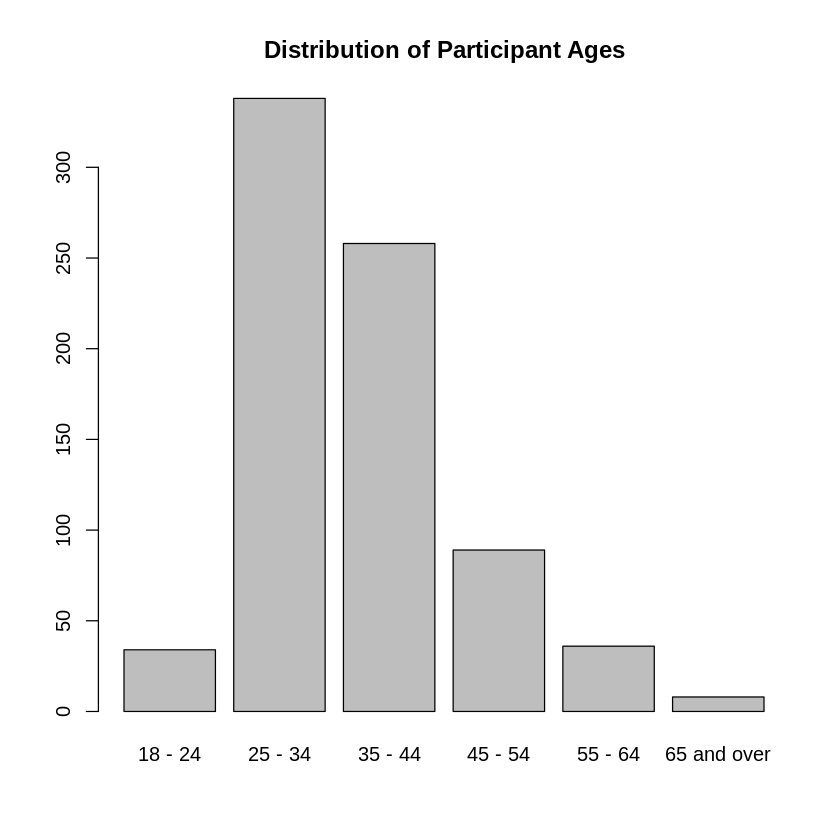

In [59]:
# find the age distribution for all survey participants
ages = select(data_completed, PG12Resp) %>% filter(PG12Resp != '')

ages = factor(ages[,])
barplot(table(ages), main = 'Distribution of Participant Ages')

In [42]:
for(i in colnames(data)) {
    data[,i] <- as.numeric(data[,i]);
}

data <- replace(data, is.na(data), 0)
sel = c()
for (i in 1:dim(data)[2]) {
    if (is.numeric(data[,i])) {
        sel = c(sel, i);
    }
}
cor(data[,sel], data[,'PG5_3HDS'], method = "spearman", use="pairwise.complete.obs");

Device,-0.0852
Completed,0.6683
Start,0.0024
End,0.6020
PG0Dis,-0.0014
PG0Shown,-0.0035
PG0Submit,0.2582
PG1PsnUse,0.2668
PG1WdAuth,0.1434
PG1Trn,0.0821
PG1Other,0.0820


In [60]:
data_filtered = select(data, -matches('Device'), -matches('End'), -matches('Start'), -contains('Submit'),
                        -contains('PG0'), -contains('PG4'), -matches('PG5_1RRPQ'), -matches('PG5_2BNUI'),
                        -matches('PG5_4VGP'), -matches('PG5_5PHR'), -matches('PG5_6SSYOP'), -matches('PG5_7NDYP'),
                        -matches('PG5_8CP'), -matches('PG5_9FRP'), -matches('PG5_10RPA'), -matches('PG5_11NSG'),
                        -matches('PG5_12NWG'), -matches('PG5_13NFG'))

for(i in colnames(data_filtered)) {
    data_filtered[,i] <- as.numeric(data_filtered[,i]);
}

data_filtered <- replace(data_filtered, is.na(data_filtered), 0)
sel = c()
for (i in 1:dim(data_filtered)[2]) {
    if (is.numeric(data_filtered[,i])) {
        sel = c(sel, i);
    }
}
cor(data_filtered[,sel], data_filtered[,'PG5_3HDS'], method = "spearman", use="pairwise.complete.obs");

Completed,0.668
PG1PsnUse,0.267
PG1WdAuth,0.143
PG1Trn,0.082
PG1Other,0.082
PG2Resp,0.411
PG2Resp.1,0.506
PG5_1Order,0.706
PG5_1Time,0.691
PG5_2Order,0.704
PG5_2Time,0.700


In [61]:
m <- lm(PG5_3HDS ~ ., data = data_filtered)
summary(m)


Call:
lm(formula = PG5_3HDS ~ ., data = data_filtered)

Residuals:
   Min     1Q Median     3Q    Max 
-2.777 -0.364 -0.037  0.076  3.558 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.466449   0.741739    1.98  0.04825 *  
Completed      0.001780   0.186068    0.01  0.99237    
PG1PsnUse     -0.040098   0.021423   -1.87  0.06147 .  
PG1WdAuth      0.012551   0.034249    0.37  0.71408    
PG1Trn         0.076061   0.076662    0.99  0.32130    
PG1Other      -0.003585   0.003297   -1.09  0.27710    
PG2Resp       -0.005409   0.028563   -0.19  0.84982    
PG2Resp.1     -0.000029   0.000594   -0.05  0.96101    
PG5_1Order     0.009289   0.010307    0.90  0.36762    
PG5_1Time     -0.000635   0.000421   -1.51  0.13149    
PG5_2Order     0.022046   0.010320    2.14  0.03285 *  
PG5_2Time     -0.000809   0.000665   -1.22  0.22395    
PG5_3Order     0.111487   0.009643   11.56  < 2e-16 ***
PG5_3Time      0.005599   0.000278   20.13  < 2e-16 ***
PG5_4